# Sistema de gestão por competências desenvolvido com o processo de people analytics

***Trabalho de Conclusão de Curso***

por **José Maria Ewerton dos Santos Junior** (Aluno) / **Alexandre Delbem** (Orientador - ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**

## Realizando a carga dos datasets

Carregando as bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
from tabulate import tabulate
datestamp = datetime.datetime.now().strftime("%Y%m%d")
start_time = time.time() # Inicializa um contador para medir o tempo de execução do pipeline

Carregando o arquivo de **Testers** (formato Excel). Colunas esperadas (ID, Nome, Senioridade, Projeto):

In [2]:
pkgdir = r'C:\Users\jmsan\Google Drive\MBA USP\Artigos para TCC\Python\Data'
Testers = pd.read_excel(f'{pkgdir}\Testers-Anonimizado.xlsx')
Testers.head()

,ID,Nome,Senioridade,Projeto
0,id_func1,nome_func1,SR,Proj7
1,id_func2,nome_func2,SR,Proj6
2,id_func3,nome_func3,JR,Proj1
3,id_func4,nome_func4,JR,Proj2
4,id_func5,nome_func5,JR,Proj7


In [3]:
# Função que encontra a senioridade para um determinado ID
def FindSeniority (ID):
    seniority = Testers.loc[Testers['ID']==ID,'Senioridade']
    if len(seniority) == 0:
        return ''
    else:
        return seniority.values[0]

In [4]:
# Função que encontra o projeto para um determinado ID
def FindProject (ID):
    project = Testers.loc[Testers['ID']==ID,'Projeto']
    if len(project) == 0:
        return ''
    else:
        return project.values[0]

Carregando o arquivo de **Foto de Skills** (formato Excel). Colunas esperadas (Tipo, Area, Skill, UniqueSkill, IDs...)

                Autoavaliação/Oferta:
                [1, 2]: Leigo. Nenhum ou pouco conhecimento no assunto.  
                ]2, 3]: Novato. Desenvolvendo a competência. Realiza com necessidade de suporte ocasional.  
                ]3, 4]: Praticante. Conhecimento consolidado. Realiza atividades de forma independente.  
                ]4, 5]: Expert. Referência no assunto. Pode ensinar e ministrar treinamentos.  

In [5]:
FotoSkills = pd.read_excel(f'{pkgdir}\FotoSkills-Anonimizado.xlsx')

In [6]:
# Cria uma coluna de UniqueSkill, concatenando o Tipo, Área e Skill
FotoSkills['UniqueSkill']=FotoSkills['Tipo']+"|"+FotoSkills['Area']+"|"+FotoSkills['Skill']

In [7]:
FotoSkills.head()

,Tipo,Area,Skill,id_func1,id_func2,id_func3,id_func4,id_func5,id_func6,id_func7,...,id_func50,id_func51,id_func52,id_func53,id_func54,id_func55,id_func56,id_func57,id_func58,UniqueSkill
0,Competências Técnicas,Gestão de Projetos,Gestão da Qualidade,3.5,3.5,1.0,1.0,2.0,2.0,2.0,...,1.0,1.0,3.0,4.2,2.0,3.0,1.0,4.0,1.0,Competências Técnicas|Gestão de Projetos|Gestã...
1,Competências Técnicas,Gestão de Projetos,Gestão de Cronograma,2.5,4.0,1.0,1.0,2.0,2.0,3.0,...,1.0,2.5,2.0,4.0,2.0,3.0,1.0,3.7,2.0,Competências Técnicas|Gestão de Projetos|Gestã...
2,Competências Técnicas,Gestão de Projetos,Gestão de Custos,1.5,2.5,1.0,1.0,2.1,2.0,1.0,...,1.0,1.0,4.0,3.5,2.0,1.0,1.0,3.5,1.0,Competências Técnicas|Gestão de Projetos|Gestã...
3,Competências Técnicas,Gestão de Projetos,Gestão de Escopo,3.0,4.0,1.0,1.0,3.1,2.0,2.0,...,1.0,3.0,3.0,3.1,2.0,2.0,1.0,4.0,1.0,Competências Técnicas|Gestão de Projetos|Gestã...
4,Competências Técnicas,Gestão de Projetos,Gestão de Métricas e indicadores,2.5,4.0,1.2,1.5,2.1,2.0,2.5,...,1.0,2.0,3.0,4.5,2.0,1.0,1.0,3.8,1.0,Competências Técnicas|Gestão de Projetos|Gestã...


Carregando o arquivo de **Demanda de Skill de Coordenadores** (formato Excel). Colunas esperadas (Tipo, Area, Skill, UniqueSkill, Projetos...)

                  Demanda:  
                  Leigo: Nenhum ou pouco conhecimento no assunto.
                  Novato: Desenvolvendo a competência. Realiza com necessidade de suporte ocasional.  
                  Praticante: Conhecimento consolidado. Realiza atividades de forma independente.  
                  Expert: Referência no assunto. Pode ensinar e ministrar treinamentos.  
                  Grupo: Conhecimento de grupo. Não requerido no projeto, mas bom alguém saber.  

In [8]:
DemandaSkillCoord = pd.read_excel(f'{pkgdir}\Demanda-Coordenadores-Anonimizado.xlsx')

In [9]:
# Cria uma coluna de UniqueSkill, concatenando o Tipo, Área e Skill
DemandaSkillCoord['UniqueSkill']=DemandaSkillCoord['Tipo']+"|"+DemandaSkillCoord['Area']+"|"+DemandaSkillCoord['Skill']

In [10]:
DemandaSkillCoord.head()

,Tipo,Area,Skill,Proj1,Proj6,Proj2,Proj3,Proj4,Proj5,Proj7,UniqueSkill
0,Competências Técnicas,Gestão de Projetos,Gestão de Cronograma,Praticante,Praticante,Praticante,Praticante,Praticante,Praticante,Praticante,Competências Técnicas|Gestão de Projetos|Gestã...
1,Competências Técnicas,Gestão de Projetos,Gestão de Riscos,Praticante,Praticante,Praticante,Praticante,Praticante,Praticante,Praticante,Competências Técnicas|Gestão de Projetos|Gestã...
2,Competências Técnicas,Gestão de Projetos,Gestão de Stakeholders,Praticante,Praticante,Praticante,Praticante,Praticante,Praticante,Praticante,Competências Técnicas|Gestão de Projetos|Gestã...
3,Competências Técnicas,Gestão de Projetos,Gestão de Pessoas,Praticante,Praticante,Praticante,Praticante,Praticante,Praticante,Praticante,Competências Técnicas|Gestão de Projetos|Gestã...
4,Competências Técnicas,Gestão de Projetos,Gestão de Métricas e indicadores,Praticante,Praticante,Praticante,Praticante,Praticante,Praticante,Praticante,Competências Técnicas|Gestão de Projetos|Gestã...


Carregando o arquivo de **Demanda de Skill de Testers** (formato Excel). Colunas esperadas (Projeto, Tipo, Area, Skill, UniqueSkill, JR, PL, SR, MS...)

In [11]:
# Especifique os projetos que serão carregados:
NomeProjetos = ['Proj1', 'Proj2','Proj3','Proj4','Proj5','Proj6','Proj7']

In [12]:
# A partir dos nomes dos projetos, prepara os nomes dos arquivos
all_files = ['Demanda-'+projeto+'.xlsx' for projeto in NomeProjetos]

In [13]:
# Lê todos os arquivos e vai apendando em um dataframe
DemandaSkillTesters = pd.concat((pd.read_excel(f'{pkgdir}\{file}') for file in all_files))

In [14]:
# Cria uma coluna de UniqueSkill, concatenando o Tipo, Área e Skill
DemandaSkillTesters['UniqueSkill']=DemandaSkillTesters['Tipo']+"|"+DemandaSkillTesters['Area']+"|"+DemandaSkillTesters['Skill']

In [15]:
DemandaSkillTesters.head()

,Projeto,Tipo,Area,Skill,JR,PL,SR,MS,UniqueSkill
0,Proj1,Competências Técnicas,Gestão de Projetos,Gestão de Cronograma,Novato,Praticante,Expert,Expert,Competências Técnicas|Gestão de Projetos|Gestã...
1,Proj1,Competências Técnicas,Gestão de Projetos,Gestão de Custos,Leigo,Leigo,Grupo,Grupo,Competências Técnicas|Gestão de Projetos|Gestã...
2,Proj1,Competências Técnicas,Gestão de Projetos,Gestão de Riscos,Novato,Praticante,Expert,Expert,Competências Técnicas|Gestão de Projetos|Gestã...
3,Proj1,Competências Técnicas,Gestão de Projetos,Gestão de Stakeholders,Leigo,Novato,Praticante,Expert,Competências Técnicas|Gestão de Projetos|Gestã...
4,Proj1,Competências Técnicas,Gestão de Projetos,Gestão de Pessoas,Novato,Praticante,Expert,Expert,Competências Técnicas|Gestão de Projetos|Gestã...


## Realizando a análise descritiva dos dados

Identificando o número de **membros** no time de QA:

In [16]:
Testers['ID'].nunique()

58

Identificando o número de **membros** por nível de senioridade:

In [17]:
# Formatando tabela - no tablefmt use 'fancy_grid', 'pretty' ou 'latex'
qry = Testers.groupby('Senioridade')['ID'].count().sort_values(ascending=False)
qry = qry.to_frame().rename(columns={'ID': 'Número de membros'})
print(tabulate(qry, headers='keys', tablefmt='latex'))

\begin{tabular}{lr}
\hline
 Senioridade   &   Número de membros \\
\hline
 JR            &                  21 \\
 TR            &                   9 \\
 PL            &                   9 \\
 SR            &                   8 \\
 ESTAG         &                   7 \\
 COOR          &                   4 \\
\hline
\end{tabular}


Identificando o número de **coordenadores** por projeto:

In [18]:
# Formatando tabela - no tablefmt use 'fancy_grid', 'pretty' ou 'latex'
qry = Testers.query("Senioridade == 'COOR'").groupby('Projeto')['ID'].count().sort_values(ascending=False)
qry = qry.to_frame().rename(columns={'ID': 'Número de coordenadores'})
print(tabulate(qry, headers='keys', tablefmt='latex'))

\begin{tabular}{lr}
\hline
 Projeto   &   Número de coordenadores \\
\hline
 Proj7     &                         1 \\
 Proj6     &                         1 \\
 Proj2     &                         1 \\
 Proj1     &                         1 \\
\hline
\end{tabular}


Identificando o número de **testers** por projeto:

In [19]:
# Formatando tabela - no tablefmt use 'fancy_grid', 'pretty' ou 'latex'
qry = Testers.query("Senioridade == 'JR' or Senioridade == 'PL' or Senioridade == 'SR' or Senioridade == 'MS'").groupby('Projeto')['ID'].count().sort_values(ascending=False)
qry = qry.to_frame().rename(columns={'ID': 'Número de testers'})
print(tabulate(qry, headers='keys', tablefmt='latex'))


\begin{tabular}{lr}
\hline
 Projeto   &   Número de testers \\
\hline
 Proj1     &                  15 \\
 Proj6     &                  11 \\
 Proj7     &                   7 \\
 Proj2     &                   2 \\
 Proj5     &                   1 \\
 Proj4     &                   1 \\
 Proj3     &                   1 \\
\hline
\end{tabular}


Identificando o número de **estagiários** por projeto:

In [20]:
# Formatando tabela - no tablefmt use 'fancy_grid', 'pretty' ou 'latex'
qry = Testers.query("Senioridade == 'ESTAG'").groupby('Projeto')['ID'].count().sort_values(ascending=False)
qry = qry.to_frame().rename(columns={'ID': 'Número de estagiários'})
print(tabulate(qry, headers='keys', tablefmt='latex'))

\begin{tabular}{lr}
\hline
 Projeto   &   Número de estagiários \\
\hline
 Proj6     &                       2 \\
 Proj1     &                       2 \\
 Proj7     &                       1 \\
 Proj5     &                       1 \\
 Proj2     &                       1 \\
\hline
\end{tabular}


Verificando a **distribuição de senioridade** por projeto:

In [21]:
Testers.groupby(["Projeto", "Senioridade"]).size()

Projeto  Senioridade
Proj1    COOR            1
         ESTAG           2
         JR             12
         PL              1
         SR              2
         TR              7
Proj2    COOR            1
         ESTAG           1
         JR              1
         PL              1
Proj3    SR              1
Proj4    PL              1
Proj5    ESTAG           1
         JR              1
Proj6    COOR            1
         ESTAG           2
         JR              5
         PL              3
         SR              3
         TR              2
Proj7    COOR            1
         ESTAG           1
         JR              2
         PL              3
         SR              2
dtype: int64

Identificando o número de Skills mapeados como demandados no time de QA Test:

In [22]:
FotoSkills.shape[0]

146

Para a identificação das top competências, utilizaremos o **Nível de Skill** para cada um dos *Unique Skills*:

\begin{equation*}
Nível\ de\ Skill  = \sum_{i=1}^n Nota_i\ \ \ \ \ \ onde\ n\ é\ o\ número\ de\ membros
\end{equation*}

In [23]:
FotoSkills['NivelSkill'] = FotoSkills.sum(axis = 1, skipna = True) 

In [24]:
FotoSkills.head()

,Tipo,Area,Skill,id_func1,id_func2,id_func3,id_func4,id_func5,id_func6,id_func7,...,id_func51,id_func52,id_func53,id_func54,id_func55,id_func56,id_func57,id_func58,UniqueSkill,NivelSkill
0,Competências Técnicas,Gestão de Projetos,Gestão da Qualidade,3.5,3.5,1.0,1.0,2.0,2.0,2.0,...,1.0,3.0,4.2,2.0,3.0,1.0,4.0,1.0,Competências Técnicas|Gestão de Projetos|Gestã...,110.5
1,Competências Técnicas,Gestão de Projetos,Gestão de Cronograma,2.5,4.0,1.0,1.0,2.0,2.0,3.0,...,2.5,2.0,4.0,2.0,3.0,1.0,3.7,2.0,Competências Técnicas|Gestão de Projetos|Gestã...,111.6
2,Competências Técnicas,Gestão de Projetos,Gestão de Custos,1.5,2.5,1.0,1.0,2.1,2.0,1.0,...,1.0,4.0,3.5,2.0,1.0,1.0,3.5,1.0,Competências Técnicas|Gestão de Projetos|Gestã...,85.6
3,Competências Técnicas,Gestão de Projetos,Gestão de Escopo,3.0,4.0,1.0,1.0,3.1,2.0,2.0,...,3.0,3.0,3.1,2.0,2.0,1.0,4.0,1.0,Competências Técnicas|Gestão de Projetos|Gestã...,105.2
4,Competências Técnicas,Gestão de Projetos,Gestão de Métricas e indicadores,2.5,4.0,1.2,1.5,2.1,2.0,2.5,...,2.0,3.0,4.5,2.0,1.0,1.0,3.8,1.0,Competências Técnicas|Gestão de Projetos|Gestã...,108.1


Identificando as **top 10 competências técnicas** do time de QA:

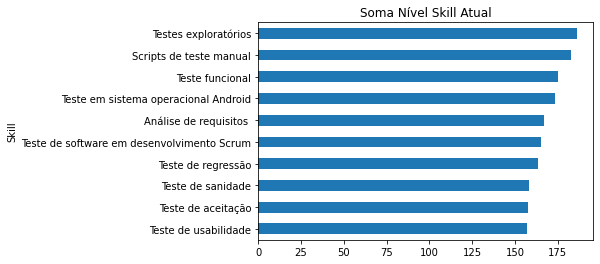

In [25]:
Top = True # Se True, indica as top, se False indica as bottom.
TopN = 10
FotoSkills.query("Tipo == 'Competências Técnicas'").sort_values(by='NivelSkill', ascending = not Top).head(TopN)[['Skill','NivelSkill']].sort_values(by='NivelSkill').plot(x = 'Skill', kind='barh', sort_columns=True, legend = False, title='Soma Nível Skill Atual')
#plt.savefig('Fig-top10comptecQA.svg')
plt.show()

Identificando as **top 10 ferramentas** que o time de QA tem mais domínio:

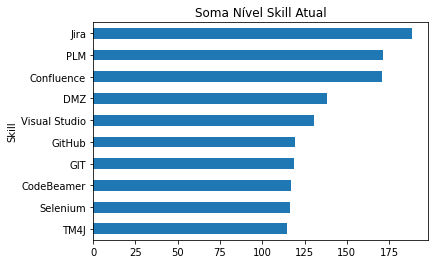

In [26]:
Top = True # Se True, indica as top, se False indica as bottom.
TopN = 10
FotoSkills.query("Tipo == 'Ferramentas'").sort_values(by='NivelSkill', ascending = not Top).head(TopN)[['Skill','NivelSkill']].sort_values(by='NivelSkill').plot(x = 'Skill', kind='barh', sort_columns=True, legend = False, title='Soma Nível Skill Atual')
plt.show()

Identificando as **top 5 linguagens** que o time de QA tem mais domínio:

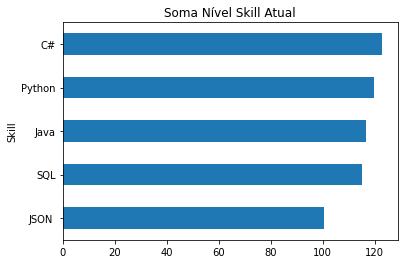

In [27]:
Top = True # Se True, indica as top, se False indica as bottom.
TopN = 5
FotoSkills.query("Tipo == 'Linguagens de Programação'").sort_values(by='NivelSkill', ascending = not Top).head(TopN)[['Skill','NivelSkill']].sort_values(by='NivelSkill').plot(x = 'Skill', kind='barh', sort_columns=True, legend = False, title='Soma Nível Skill Atual')

Identificando as **top 5 competências comportamentais** do time de QA:

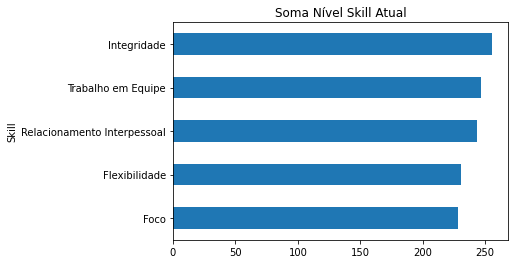

In [28]:
Top = True # Se True, indica as top, se False indica as bottom.
TopN = 5
FotoSkills.query("Tipo == 'Competências Comportamentais'").sort_values(by='NivelSkill', ascending = not Top).head(TopN)[['Skill','NivelSkill']].sort_values(by='NivelSkill').plot(x = 'Skill', kind='barh', sort_columns=True, legend = False, title='Soma Nível Skill Atual')

Identificando as **top 15 competências técnicas** mais demandadas dos coordenadores:

In [29]:
# Fazendo a substituição das classes por notas médias de cada uma das classes
DemandaSkillCoordNota = DemandaSkillCoord.replace({'Leigo': 1.5, 'Novato': 2.5, 'Praticante': 3.5, 'Expert': 4.5, 'Grupo': 0.5 }, inplace=False)

In [30]:
DemandaSkillCoordNota['SomaNotas'] = DemandaSkillCoordNota.sum(axis = 1, skipna = True) 

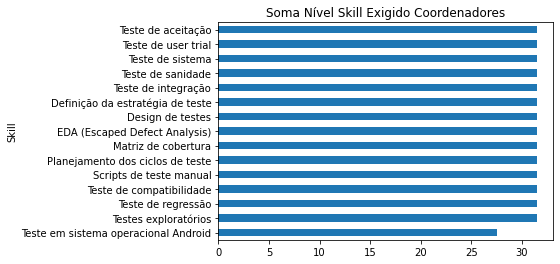

In [31]:
Top = True # Se True, indica as top, se False indica as bottom.
TopN = 15
DemandaSkillCoordNota.query("Tipo == 'Competências Técnicas'").sort_values(by='SomaNotas', ascending = not Top).head(TopN)[['Skill','SomaNotas']].sort_values(by='SomaNotas').plot(x = 'Skill', kind='barh', sort_columns=True, legend = False, title='Soma Nível Skill Exigido Coordenadores')

Identificando as **top 5 ferramentas** mais demandadas dos coordenadores:

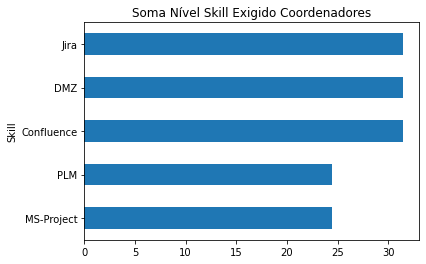

In [32]:
Top = True # Se True, indica as top, se False indica as bottom.
TopN = 5
DemandaSkillCoordNota.query("Tipo == 'Ferramentas'").sort_values(by='SomaNotas', ascending = not Top).head(TopN)[['Skill','SomaNotas']].sort_values(by='SomaNotas').plot(x = 'Skill', kind='barh', sort_columns=True, legend = False, title='Soma Nível Skill Exigido Coordenadores')

Identificando as **top 20 competências comportamentais** mais demandadas dos coordenadores:

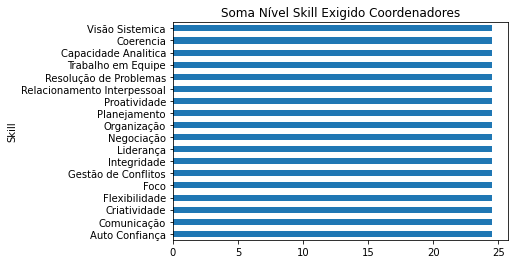

In [33]:
Top = True # Se True, indica as top, se False indica as bottom.
TopN = 20
DemandaSkillCoordNota.query("Tipo == 'Competências Comportamentais'").sort_values(by='SomaNotas', ascending = not Top).head(TopN)[['Skill','SomaNotas']].sort_values(by='SomaNotas').plot(x = 'Skill', kind='barh', sort_columns=True, legend = False, title='Soma Nível Skill Exigido Coordenadores')

Identificando as **top 20 competências técnicas** mais demandadas dos testadores:

In [34]:
# Fazendo a substituição das classes por notas médias de cada uma das classes
DemandaSkillTestersNota = DemandaSkillTesters.replace({'Leigo': 1.5, 'Novato': 2.5, 'Praticante': 3.5, 'Expert': 4.5, 'Grupo': 0.5 }, inplace=False)

In [35]:
DemandaSkillTestersNota.head()

,Projeto,Tipo,Area,Skill,JR,PL,SR,MS,UniqueSkill
0,Proj1,Competências Técnicas,Gestão de Projetos,Gestão de Cronograma,2.5,3.5,4.5,4.5,Competências Técnicas|Gestão de Projetos|Gestã...
1,Proj1,Competências Técnicas,Gestão de Projetos,Gestão de Custos,1.5,1.5,0.5,0.5,Competências Técnicas|Gestão de Projetos|Gestã...
2,Proj1,Competências Técnicas,Gestão de Projetos,Gestão de Riscos,2.5,3.5,4.5,4.5,Competências Técnicas|Gestão de Projetos|Gestã...
3,Proj1,Competências Técnicas,Gestão de Projetos,Gestão de Stakeholders,1.5,2.5,3.5,4.5,Competências Técnicas|Gestão de Projetos|Gestã...
4,Proj1,Competências Técnicas,Gestão de Projetos,Gestão de Pessoas,2.5,3.5,4.5,4.5,Competências Técnicas|Gestão de Projetos|Gestã...


In [36]:
DemandaSkillTestersNota['SomaNotas'] = DemandaSkillTestersNota.sum(axis = 1, skipna = True) 

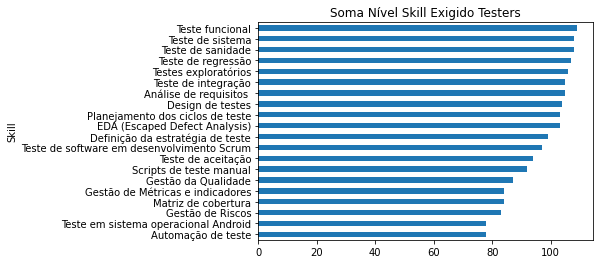

In [37]:
Top = True # Se True, indica as top, se False indica as bottom.
TopN = 20
DemandaSkillTestersNota.query("Tipo == 'Competências Técnicas'").groupby('Skill')['SomaNotas'].sum().sort_values(ascending = not Top).head(TopN).sort_values().plot(x = 'Skill', kind='barh', sort_columns=True, legend = False, title='Soma Nível Skill Exigido Testers')

Identificando as **top 10 ferramentas** mais demandadas dos testadores:

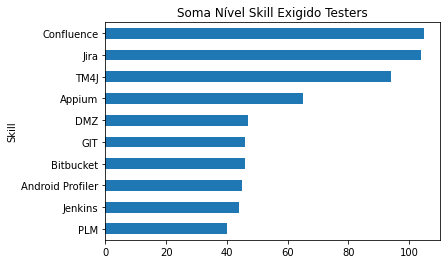

In [38]:
Top = True # Se True, indica as top, se False indica as bottom.
TopN = 10
DemandaSkillTestersNota.query("Tipo == 'Ferramentas'").groupby('Skill')['SomaNotas'].sum().sort_values(ascending = not Top).head(TopN).sort_values().plot(x = 'Skill', kind='barh', sort_columns=True, legend = False, title='Soma Nível Skill Exigido Testers')

Identificando as **top 10 linguagens** mais demandadas dos testadores:

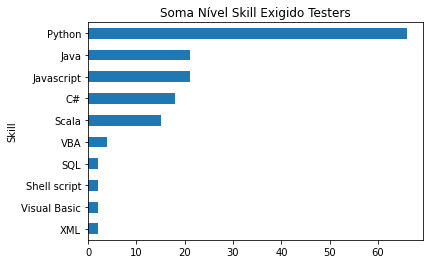

In [39]:
Top = True # Se True, indica as top, se False indica as bottom.
TopN = 10
DemandaSkillTestersNota.query("Tipo == 'Linguagens de Programação'").groupby('Skill')['SomaNotas'].sum().sort_values(ascending = not Top).head(TopN).sort_values().plot(x = 'Skill', kind='barh', sort_columns=True, legend = False, title='Soma Nível Skill Exigido Testers')

Identificando as **top 10 competências comportamentais** mais demandadas dos testadores:

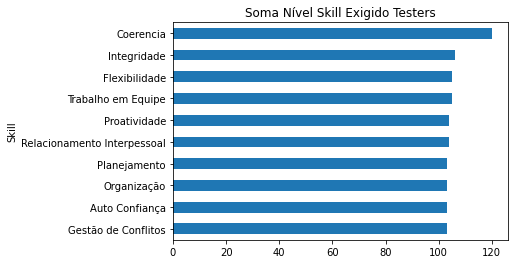

In [40]:
Top = True # Se True, indica as top, se False indica as bottom.
TopN = 10
DemandaSkillTestersNota.query("Tipo == 'Competências Comportamentais'").groupby('Skill')['SomaNotas'].sum().sort_values(ascending = not Top).head(TopN).sort_values().plot(x = 'Skill', kind='barh', sort_columns=True, legend = False, title='Soma Nível Skill Exigido Testers')

Dado um Skill específico, mostra a distribuição das autoavaliações:

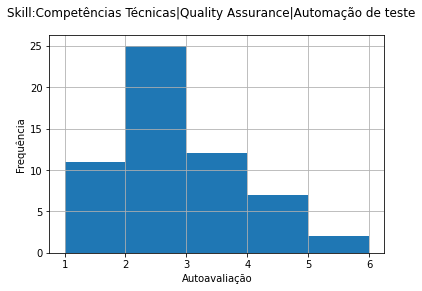

In [41]:
Skill2Search = 'Competências Técnicas|Quality Assurance|Automação de teste' # Entre aqui o skill a ser mostrada a distribuição
colnum_UniqueSkill=FotoSkills.columns.get_loc('UniqueSkill')
vetor=FotoSkills.loc[FotoSkills['UniqueSkill']==Skill2Search]
skill=FotoSkills.loc[FotoSkills['UniqueSkill']==Skill2Search,'UniqueSkill'].values[0]
pd.to_numeric(vetor.iloc[:,3:colnum_UniqueSkill].T.iloc[:,0]).hist(bins=[1, 2, 3, 4, 5, 6])
plt.suptitle("Skill:"+skill)
plt.xlabel('Autoavaliação')
plt.ylabel('Frequência')
#plt.savefig('histograma.pdf')
plt.show()

Outro jeito de determinar o histograma do Skill autoavaliado, agora considerando o parâmetro TargetSeniority

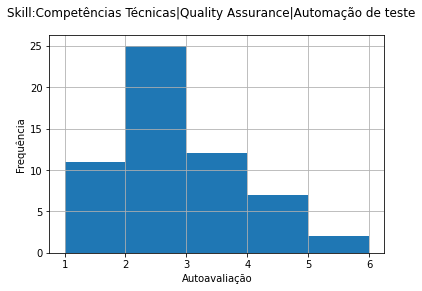

In [42]:
# Descomente a linha TargetSeniority - Senioridade a ser considerada no filtro: ESTAG, TR, JR, PL, SR, MS, COOR
# >>> Para senioridade baixa, descomente a linha:
#TargetSeniority = "Senioridade == 'ESTAG' or Senioridade == 'TR' or Senioridade == 'JR'"
# >>> Para todas as senioridades, descomente a linha:
TargetSeniority = "Senioridade == 'ESTAG' or Senioridade == 'TR' or Senioridade == 'JR' or Senioridade == 'PL' or Senioridade == 'SR' or Senioridade == 'MS' or Senioridade == 'COOR'"
Skill2Search = 'Competências Técnicas|Quality Assurance|Automação de teste' # Entre aqui o skill a ser mostrada a distribuição

X = FotoSkills.T.copy()
X.columns = X.loc['UniqueSkill']
line_UniqueSkill=X.index.get_loc('UniqueSkill')
X = X.iloc[3:line_UniqueSkill,0:] 
X = X.reset_index()
X['Senioridade']=X.apply(lambda row: FindSeniority(row['index']), axis=1)
X = X.query(TargetSeniority) # filtra pelo parâmetro TargetSeniority
X.reset_index(drop=True, inplace=True)
X = X.rename_axis("", axis="columns")
X = X.drop(['index', 'Senioridade'], axis=1)
pd.to_numeric(X[Skill2Search]).hist(bins=[1, 2, 3, 4, 5, 6])
plt.suptitle("Skill:"+Skill2Search)
plt.xlabel('Autoavaliação')
plt.ylabel('Frequência')
#plt.savefig('histograma.pdf')
plt.show()

Mostra um histograma para cada Skill que foi autoavaliado:

In [43]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure(figsize=[15,2*n_rows])
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=[1, 2, 3, 4, 5, 6],ax=ax)
        #ax.set_title(var_name)
        ax.set_title(var_name, fontdict={'fontsize': 12, 'fontweight': 'medium'})
    fig.tight_layout(pad=2)  
    plt.savefig('histograma.pdf')
    plt.show()

In [44]:
# Ajustando a matriz no formato skills x autoavaliações

# Descomente a linha TargetSeniority - Senioridade a ser considerada no filtro: ESTAG, TR, JR, PL, SR, MS, COOR
# >>> Para senioridade baixa, descomente a linha:
TargetSeniority = "Senioridade == 'ESTAG' or Senioridade == 'TR' or Senioridade == 'JR'"
# >>> Para todas as senioridades, descomente a linha:
#TargetSeniority = "Senioridade == 'ESTAG' or Senioridade == 'TR' or Senioridade == 'JR' or Senioridade == 'PL' or Senioridade == 'SR' or Senioridade == 'MS' or Senioridade == 'COOR'"
#TargetSeniority = "Senioridade == 'PL' or Senioridade == 'SR' or Senioridade == 'MS' or Senioridade == 'COOR'"

X = FotoSkills.T.copy()
X.columns = X.iloc[2]
line_UniqueSkill=X.index.get_loc('UniqueSkill')
X = X.iloc[3:line_UniqueSkill,0:] 
X = X.reset_index()
X['Senioridade']=X.apply(lambda row: FindSeniority(row['index']), axis=1)
X = X.query(TargetSeniority)
X.reset_index(drop=True, inplace=True)
X = X.rename_axis("", axis="columns")
X = X.drop(['index', 'Senioridade'], axis=1)

In [45]:
# Selecionando os skills a serem apresentados
X = X[['Gestão da Qualidade', 'Gestão de Cronograma', 'Gestão de Pessoas', 'Gestão de Riscos',
'Análise de requisitos ', 'Automação de teste', 'Confluence', 'Definição da estratégia de teste',
'Teste de Machine Learning', 'Artifactory', 'Gatling', 'Inspect',
'Scripts de teste manual', 'Teste em sistema operacional Android', 'PLM', 'Testes exploratórios',
'Teste de aceitação', 'Teste de regressão', 'Teste de sanidade', 'Teste de sistema',
'Auto Confiança', 'Foco', 'Proatividade', 'Trabalho em Equipe']]

#X = X[['Teste de aceitação', 'Teste de regressão', 'Teste de sanidade', 'Teste de sistema']]

#X = X[['Gestão da Qualidade', 'Gestão de Cronograma', 'Gestão de Pessoas', 'Gestão de Riscos']]



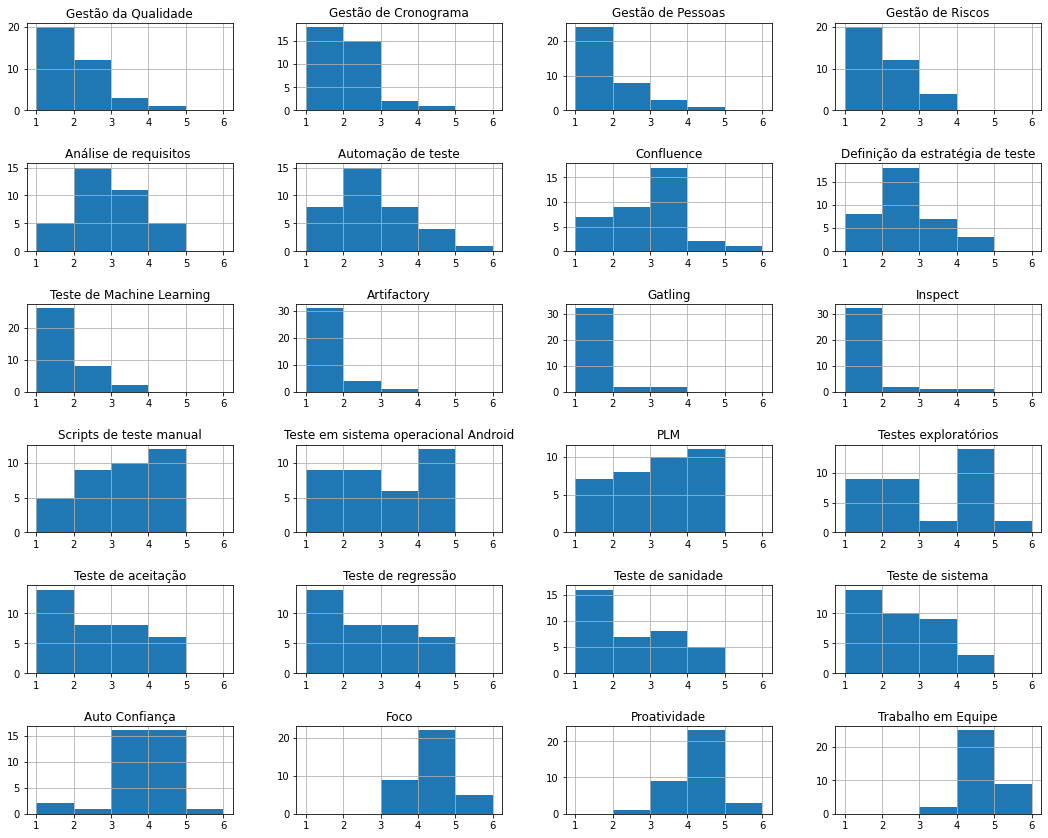

In [46]:
# Ajustando os parâmetros e plotando o histograma
ncols = 4
nrows = ((X.shape[1] - 1) // ncols) + 1
draw_histograms(X, X.columns, nrows, ncols)

Levantando um gráfico de barra empilhado para os Skills autoavaliados:

In [47]:
TargetSeniority = "Senioridade == 'ESTAG' or Senioridade == 'TR' or Senioridade == 'JR' or Senioridade == 'PL' or Senioridade == 'SR' or Senioridade == 'MS' or Senioridade == 'COOR'"
X = FotoSkills.T.copy()
X.columns = X.iloc[2]
X = X.iloc[3:-2,0:] 
X = X.reset_index()
X['Senioridade']=X.apply(lambda row: FindSeniority(row['index']), axis=1)
X = X.query(TargetSeniority)
X.reset_index(drop=True, inplace=True)
X = X.rename_axis("", axis="columns")
X = X.drop(['index', 'Senioridade'], axis=1)

In [48]:
# Selecionando os skills a serem apresentados
X = X[['Gestão da Qualidade', 'Gestão de Cronograma', 'Gestão de Pessoas', 'Gestão de Riscos',
'Análise de requisitos ', 'Automação de teste', 'Confluence', 'Definição da estratégia de teste',
'Teste de Machine Learning', 'Artifactory', 'Gatling', 'Inspect',
'Scripts de teste manual', 'Teste em sistema operacional Android', 'PLM', 'Testes exploratórios',
'Teste de aceitação', 'Teste de regressão', 'Teste de sanidade', 'Teste de sistema',
'Auto Confiança', 'Foco', 'Proatividade', 'Trabalho em Equipe']]

In [49]:
def CountLevelSkill (vetorskill):
    NLeigo = vetorskill.loc[lambda x : (x>=1) & (x<=2)].count()
    NNovato = vetorskill.loc[lambda x : (x>2) & (x<=3)].count()
    NPraticante = vetorskill.loc[lambda x : (x>3) & (x<=4)].count()
    NExpert = vetorskill.loc[lambda x : (x>4) & (x<=5)].count()
    return [NLeigo, NNovato, NPraticante, NExpert]

In [50]:
ListStacked = []
for skill in X.columns:
    ListStacked.append (CountLevelSkill (X[skill]))
    
# Inicializando um dataframe para armazenar a estrutura de dados a ser utilizada no gráfico de barras
col_names =  ['Qtde de Leigos', 'Qtde de Novatos', 'Qtde de Praticantes', 'Qtde de Experts']
StackedSkills = pd.DataFrame(ListStacked, columns = col_names, index = X.columns)

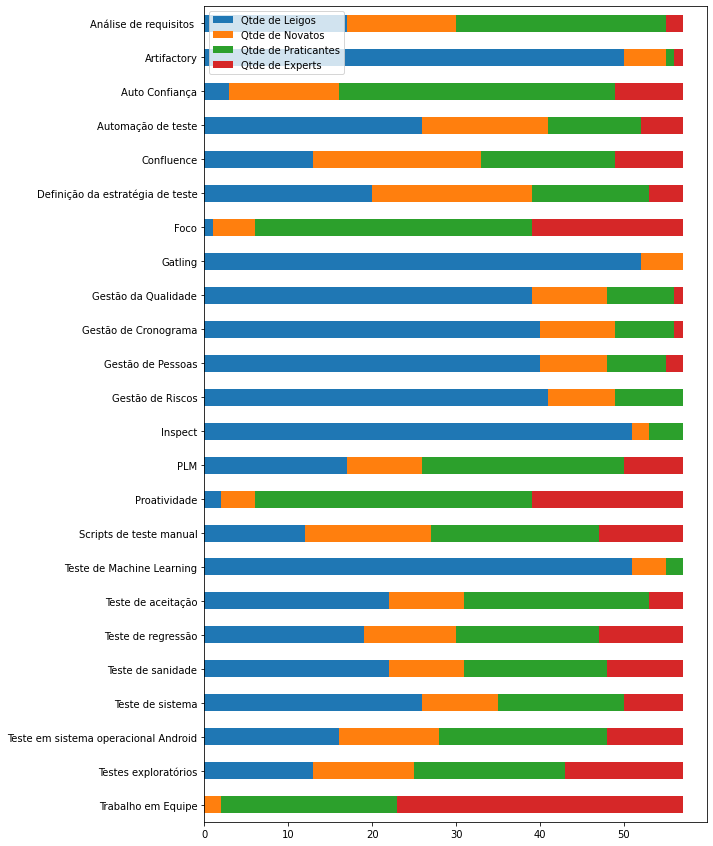

In [51]:
StackedSkills.sort_index(ascending=True, inplace = True)

# Legenda: Azul (Qtde de Leigos), Laranja (Qtde de Novatos), Verde (Qtde de Praticantes), Vermelho (Qtde de Experts)

for linhainicial in range (0, StackedSkills.shape[0], 25):
    StackedSkills[linhainicial:(linhainicial+25)].sort_index(ascending=False).plot.barh(stacked = True, legend = True, figsize=(9,15))


Identifique os **top 5 testers em um dado skill ($SK_i$)**:

In [52]:
Skill2Search = 'Ferramentas|-|Brity RPA' # Entre aqui o skill a ser buscado
Top = True # Se True, indica as top, se False indica as bottom.
TopN = 5
colnum_UniqueSkill=FotoSkills.columns.get_loc('UniqueSkill')
# Formatando tabela - no tablefmt use 'fancy_grid', 'pretty' ou 'latex'
qry = FotoSkills.loc[FotoSkills['UniqueSkill']==Skill2Search].iloc[:,3:colnum_UniqueSkill].T.iloc[:,0].sort_values(ascending = not Top).head(TopN)
qry = qry.to_frame()
print(tabulate(qry, headers=['ID Colaborador', 'Nível de Skill Atual'], tablefmt='latex', numalign='center', floatfmt=".1f"))

\begin{tabular}{lc}
\hline
 ID Colaborador   &  Nível de Skill Atual  \\
\hline
 id\_func8         &          4.0           \\
 id\_func47        &          3.1           \\
 id\_func40        &          3.0           \\
 id\_func12        &          3.0           \\
 id\_func23        &          3.0           \\
\hline
\end{tabular}


Identificando os testers com os mais altos valores de média de Skill:

In [53]:
Top = True # Se True, indica as top, se False indica as bottom.
TopN = 10
colnum_UniqueSkill=FotoSkills.columns.get_loc('UniqueSkill')
# Formatando tabela - no tablefmt use 'fancy_grid', 'pretty' ou 'latex'
qry = FotoSkills.iloc[:,3:colnum_UniqueSkill].mean().sort_values(ascending = not Top).head(TopN)
qry = qry.to_frame()
print(tabulate(qry, headers=['ID Colaborador', 'Média de Skill Atual'], tablefmt='latex', numalign='center', floatfmt=".1f"))

\begin{tabular}{lc}
\hline
 ID Colaborador   &  Média de Skill Atual  \\
\hline
 id\_func49        &          3.0           \\
 id\_func11        &          3.0           \\
 id\_func23        &          2.9           \\
 id\_func57        &          2.7           \\
 id\_func25        &          2.7           \\
 id\_func2         &          2.7           \\
 id\_func35        &          2.7           \\
 id\_func14        &          2.7           \\
 id\_func20        &          2.6           \\
 id\_func24        &          2.6           \\
\hline
\end{tabular}


## Realizando análises mais complexas

Identificando os **testadores outliers** (1.5 x IQR Intervalo Inter-quartil) por Skill:

* amplitude - ou intervalo - interquartil (IQR, *interquartile range*)  
    Sejam:
    - $Q_{1}$ o valor relativo aos primeiros 25% dados,
    - $Q_{2}$ o valor relativo aos primeiros 50% dados (mediana),
    - $Q_{3}$ o valor relativo aos primeiros 75% dos dados,
    
    $$IQR = Q_{3} - Q_{1}$$


In [54]:
colnum_UniqueSkill=FotoSkills.columns.get_loc('UniqueSkill')

In [55]:
# Calculo do limite com base no IQR. Limite = Q3 + (1.5*IQR)
FotoSkills['LimiteIQR'] = FotoSkills.iloc[:,:colnum_UniqueSkill].quantile(q=0.75, axis=1) + 1.5*(FotoSkills.iloc[:,:colnum_UniqueSkill].quantile(q=0.75, axis=1) - FotoSkills.iloc[:,:colnum_UniqueSkill].quantile(q=0.25, axis=1))

In [56]:
# Abre um arquivo para armazenar a lista de Top Testers
f= open(f"{pkgdir}\Lista_TopTesters_{datestamp}.txt","w+") 

ListTopTesters=[]
print ('Lista de Outliers - autoavaliação superior a 1.5 x IQR')
for skill in FotoSkills['UniqueSkill']:
    ListTester=[]
    for tester in Testers['ID']:
        nivel = FotoSkills.loc[FotoSkills['UniqueSkill']==skill,tester].values[0]
        limite = FotoSkills.loc[FotoSkills['UniqueSkill']==skill,'LimiteIQR'].values[0]  # Limite com 1.5*IQR
        if (nivel > limite) and (nivel>2): # Se identificou um outlier e a autoavaliação é pelo menos Novato
            # Preenche a tabela de Top Testers
            ListTopTesters.append([tester, skill, nivel, limite, 'Validar a autoavaliação.'])
            # Faz um append do ID do tester na lista a ser exibida
            ListTester.append (tester)
    if len(ListTester)>0:
        StringTesters = ', '.join(ListTester)
        print(f'{skill}: {StringTesters}')    
        f.write(f'{skill}: {StringTesters}\n')
f.close() 

Lista de Outliers - autoavaliação superior a 1.5 x IQR
Competências Técnicas|Gestão de Projetos|Gestão de Custos: id_func49, id_func52
Competências Técnicas|Gestão de Projetos|Gestão de Stakeholders: id_func2, id_func20, id_func23, id_func35, id_func49, id_func52, id_func57
Competências Técnicas|Quality Assurance|Behavior Driven Development: id_func43
Competências Técnicas|Quality Assurance|Teste de banco de dados: id_func25, id_func49
Competências Técnicas|Quality Assurance|Teste de benchmark: id_func20, id_func23, id_func57
Competências Técnicas|Quality Assurance|Teste de contrato: id_func25, id_func49
Competências Técnicas|Quality Assurance|Teste de IA: id_func9, id_func16, id_func17, id_func18, id_func50, id_func53, id_func57
Competências Técnicas|Quality Assurance|Teste de Machine Learning: id_func2, id_func8, id_func16, id_func21, id_func57
Competências Técnicas|Quality Assurance|Teste de nuvem AWS: id_func25
Competências Técnicas|Quality Assurance|Teste de nuvem Azure: id_func34

In [57]:
# Inicializando um dataframe para armazenar a estrutura de dados a ser utilizada no Top Testers
col_names =  ['ID', 'UniqueSkill', 'Autoavaliação', 'LimiteIQR', 'Ação']
TopTesters = pd.DataFrame(ListTopTesters, columns = col_names)

In [58]:
# Identifica potenciais anomalias nos TopTesters, se Senioridade for ESTAG, TR ou JR
TargetSeniority = "Senioridade == 'ESTAG' or Senioridade == 'TR' or Senioridade == 'JR'"
TopTestersAnomalies = TopTesters[['ID', 'UniqueSkill']].copy()
TopTestersAnomalies['Senioridade'] = TopTestersAnomalies.apply(lambda row: FindSeniority(row['ID']), axis=1)
qry = TopTestersAnomalies.sort_values(by='ID').query(TargetSeniority)
print(tabulate(qry, headers=['ID Colaborador', 'Skill', 'Senioridade'], tablefmt='latex', numalign='center', floatfmt=".1f", showindex=False))
qry.to_excel(f"{pkgdir}\Lista_TopTesters_Anomalies_{datestamp}.xlsx", index=False) # salvando em um arquivo

\begin{tabular}{lll}
\hline
 ID Colaborador   & Skill                                                                     & Senioridade   \\
\hline
 id\_func10        & Competências Técnicas|Quality Assurance|Teste de Realidade Virtual (VR)   & JR            \\
 id\_func15        & Ferramentas|-|BEAT                                                        & TR            \\
 id\_func15        & Ferramentas|-|JUnit                                                       & TR            \\
 id\_func15        & Ferramentas|-|PyCharm                                                     & TR            \\
 id\_func15        & Competências Comportamentais|-|Coerencia                                  & TR            \\
 id\_func15        & Linguagens de Programação|-|JSON                                          & TR            \\
 id\_func15        & Linguagens de Programação|-|Javascript                                    & TR            \\
 id\_func15        & Ferramentas|-|Sikuli             

\end{tabular}


Dado um tester ($tester_i$) de senioridade ($Senioridade_j$) que trabalha em um projeto ($Proj_k$), quais os skills ($SK_l$) que ele já tem no nível adequado e quais eles precisa desenvolver?

In [59]:
# Função que converte de um valor numérico de nível de Skill para a classe
def ConvertSkillNum2Class (value):
    if np.isnan(value):
        return 'Não Avaliado'
    elif value<=2:
        return 'Leigo'
    elif value>2 and value<=3:
        return 'Novato'
    elif value>3 and value<=4:
        return 'Praticante'
    elif value>4 and value<=5:
        return 'Expert'    

In [60]:
# Função que converte de uma classe de Skill para uma avalicação numérica
def ConvertSkillClass2Num (classe):
    if classe == 'Leigo':
        return 2
    elif classe == 'Novato':
        return 3
    elif classe == 'Praticante':
        return 4
    elif classe == 'Expert':
        return 5
    elif classe == 'Grupo':
        return 0

In [61]:
# Função que retorna a diferença de gap e uma mensagem para a ação a ser tomada
def GetGapScore (demandado, ofertado):
    if demandado=='Grupo':
        return [0,'Possibilidade de desenvolvimento extra. Validar a autoavaliação/Traçar plano.']
    elif ofertado=='Não Avaliado':
        return [0,'Solicitar autoavaliação']
    elif ConvertSkillClass2Num(demandado)<=ConvertSkillClass2Num(ofertado):
        return [0,'Nível adequado. Validar a autoavaliação.']
    elif ConvertSkillClass2Num(demandado)>ConvertSkillClass2Num(ofertado):
        return [ConvertSkillClass2Num(demandado)-ConvertSkillClass2Num(ofertado),'Traçar plano de desenvolvimento.']

In [62]:
ListGapAnalysis = []
for tester in Testers['ID']:
    Senioridade = Testers.loc[Testers['ID']==tester,'Senioridade'].values[0]
    Proj = Testers.loc[Testers['ID']==tester,'Projeto'].values[0]
    if Senioridade == 'COOR':
        ListaSkillDemandado = ListaSkillDemandado=DemandaSkillCoord['UniqueSkill']
        for skill in ListaSkillDemandado:
            NivelDemandado = DemandaSkillCoord.loc[DemandaSkillCoord['UniqueSkill']==skill,Proj].values[0]
            NivelOfertado = ConvertSkillNum2Class(FotoSkills.loc[FotoSkills['UniqueSkill']==skill,tester].values[0])
            GapScore, Acao = GetGapScore(NivelDemandado, NivelOfertado)
            ListGapAnalysis.append([tester,Proj,skill,NivelDemandado,NivelOfertado,GapScore,Acao,''])
    else:
        ListaSkillDemandado = DemandaSkillTesters.loc[DemandaSkillTesters['Projeto']==Proj,'UniqueSkill']
        SenioridadeAjustada = 'JR' if (Senioridade=='ESTAG' or Senioridade=='TR') else Senioridade
        for skill in ListaSkillDemandado:
            NivelDemandado = DemandaSkillTesters.loc[(DemandaSkillTesters['UniqueSkill']==skill) & (DemandaSkillTesters['Projeto']==Proj),SenioridadeAjustada].values[0]
            NivelOfertado = ConvertSkillNum2Class(FotoSkills.loc[FotoSkills['UniqueSkill']==skill,tester].values[0])
            GapScore, Acao = GetGapScore(NivelDemandado, NivelOfertado)
            ListGapAnalysis.append([tester,Proj,skill,NivelDemandado,NivelOfertado,GapScore,Acao,''])
            

In [63]:
# Inicializando um dataframe para armazenar a estrutura de dados a ser utilizada na análise
col_names =  ['ID', 'Projeto', 'UniqueSkill', 'NivelDemandado', 'NivelOfertado', 'GapScore', 'Ação', 'Plano']
GapAnalysis = pd.DataFrame(ListGapAnalysis, columns = col_names)

In [64]:
# Salva para cada testador uma planilha de análise de gap de skill (a ser usada como suporte para Plano de Desenvolvimento Individual)
for tester in Testers['ID']:
    sheet_toptester = TopTesters.loc[TopTesters['ID']==tester,['UniqueSkill', 'Autoavaliação', 'LimiteIQR', 'Ação']]
    sheet_gapanalysis = GapAnalysis.loc[GapAnalysis['ID']==tester,['ID','Projeto','UniqueSkill','NivelDemandado','NivelOfertado','GapScore','Ação','Plano']]
    sheet_gapanalysis.sort_values(by=['GapScore','Ação'], ascending=[False,True], inplace=True)
    with pd.ExcelWriter(f'{pkgdir}\GapAnalysis_{tester}_{datestamp}.xlsx') as writer:  
        sheet_toptester.to_excel(writer, sheet_name='TopTester', index=False)
        sheet_gapanalysis.to_excel(writer, sheet_name='GapAnalysis', index=False)    
    print(f'>>>>>> Salvando planilha: GapAnalysis_{tester}_{datestamp}.xlsx')  


>>>>>> Salvando planilha: GapAnalysis_id_func1_20201226.xlsx
>>>>>> Salvando planilha: GapAnalysis_id_func2_20201226.xlsx
>>>>>> Salvando planilha: GapAnalysis_id_func3_20201226.xlsx
>>>>>> Salvando planilha: GapAnalysis_id_func4_20201226.xlsx
>>>>>> Salvando planilha: GapAnalysis_id_func5_20201226.xlsx
>>>>>> Salvando planilha: GapAnalysis_id_func6_20201226.xlsx
>>>>>> Salvando planilha: GapAnalysis_id_func7_20201226.xlsx
>>>>>> Salvando planilha: GapAnalysis_id_func8_20201226.xlsx
>>>>>> Salvando planilha: GapAnalysis_id_func9_20201226.xlsx
>>>>>> Salvando planilha: GapAnalysis_id_func10_20201226.xlsx
>>>>>> Salvando planilha: GapAnalysis_id_func11_20201226.xlsx
>>>>>> Salvando planilha: GapAnalysis_id_func12_20201226.xlsx
>>>>>> Salvando planilha: GapAnalysis_id_func13_20201226.xlsx
>>>>>> Salvando planilha: GapAnalysis_id_func14_20201226.xlsx
>>>>>> Salvando planilha: GapAnalysis_id_func15_20201226.xlsx
>>>>>> Salvando planilha: GapAnalysis_id_func16_20201226.xlsx
>>>>>> Salvando p

Identificando as **top 10 skills** que apresentam maior gap acumulado entre demandado e ofertado no time de QA:

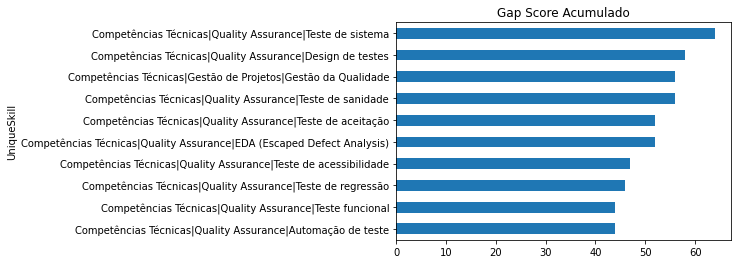

In [65]:
Top = True # Se True, indica as top, se False indica as bottom.
TopN = 10
GapAnalysis.groupby('UniqueSkill')['GapScore'].sum().sort_values(ascending = not Top).head(TopN).sort_values().plot(kind='barh', sort_columns=True, legend = False, title='Gap Score Acumulado')

In [66]:
# Formatando tabela - no tablefmt use 'fancy_grid', 'pretty' ou 'latex'
qry = GapAnalysis.groupby('UniqueSkill')['GapScore'].sum().sort_values(ascending = not Top).head(TopN)
qry = qry.to_frame()
print(tabulate(qry, headers=['UniqueSkill', 'Gap Score'], tablefmt='fancy_grid', numalign='center', floatfmt=".0f"))

╒═══════════════════════════════════════════════════════════════════════╤═════════════╕
│ UniqueSkill                                                           │  Gap Score  │
╞═══════════════════════════════════════════════════════════════════════╪═════════════╡
│ Competências Técnicas|Quality Assurance|Teste de sistema              │     64      │
├───────────────────────────────────────────────────────────────────────┼─────────────┤
│ Competências Técnicas|Quality Assurance|Design de testes              │     58      │
├───────────────────────────────────────────────────────────────────────┼─────────────┤
│ Competências Técnicas|Quality Assurance|Teste de sanidade             │     56      │
├───────────────────────────────────────────────────────────────────────┼─────────────┤
│ Competências Técnicas|Gestão de Projetos|Gestão da Qualidade          │     56      │
├───────────────────────────────────────────────────────────────────────┼─────────────┤
│ Competências Técnicas|Quality 

Identifique os maiores gaps entre demandado e ofertado por projeto:

In [67]:
# Cria um arquivo GapTotal_PorProjeto_<datestamp>.xlsx
data=pd.DataFrame({'GapScore' : GapAnalysis.loc[GapAnalysis['GapScore']>0].groupby(['Projeto', 'UniqueSkill'])['GapScore'].sum()}).reset_index()
data.sort_values(by=['Projeto','GapScore','UniqueSkill'], ascending=[True,False,True], inplace=True)
data.to_excel(f'{pkgdir}\GapTotal_PorProjeto_{datestamp}.xlsx', index=False)

In [68]:
# Retirando um trecho para exemplificar o gap total por projeto
qry = data
print(tabulate(qry, headers=qry.columns, tablefmt='latex', numalign='center', floatfmt=".1f", showindex=False))

\begin{tabular}{llc}
\hline
 Projeto   & UniqueSkill                                                                          &  GapScore  \\
\hline
 Proj1     & Competências Técnicas|Gestão de Projetos|Gestão da Qualidade                         &     41     \\
 Proj1     & Competências Técnicas|Quality Assurance|Design de testes                             &     40     \\
 Proj1     & Ferramentas|-|BEAT                                                                   &     37     \\
 Proj1     & Competências Técnicas|Quality Assurance|Automação de teste                           &     36     \\
 Proj1     & Competências Técnicas|Quality Assurance|EDA (Escaped Defect Analysis)                &     36     \\
 Proj1     & Competências Técnicas|Quality Assurance|Teste de regressão                           &     35     \\
 Proj1     & Competências Técnicas|Quality Assurance|Teste de acessibilidade                      &     34     \\
 Proj1     & Competências Técnicas|Quality Assurance|

Dado o projeto ($Proj_i$) e uma senioridade ($Senioridade_j$), quais os *TopN* testadores que possuem os maiores "matches"?

In [69]:
# Valores de entrada:
Project2Search = 'Proj6'  # Este é o Proji
Seniority2Search = 'PL'  # Escolha uma opção: JR, PL, SR ou MS (esta é a Senioridadej)

In [70]:
# implementando a função de distância euclidiana
def dEuclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [71]:
demanda=DemandaSkillTesters.loc[DemandaSkillTesters['Projeto']==Project2Search,['UniqueSkill',Seniority2Search]]
ListDissimilaridade=[]
for tester in Testers['ID']:
    ListDemanda=[]
    ListOferta=[]
    SenioridadeTester = Testers.loc[Testers['ID']==tester,'Senioridade'].values[0]
    for skill in demanda['UniqueSkill']:
        nivel_demandado = ConvertSkillClass2Num(demanda.loc[demanda['UniqueSkill']==skill,Seniority2Search].values[0])
        nivel_ofertado = FotoSkills.loc[FotoSkills['UniqueSkill']==skill,tester].values[0]
        if nivel_demandado != 0: # Só inclui os valores de skills demandados diferente de Grupo
            ListDemanda.append(nivel_demandado)
            ListOferta.append(nivel_ofertado)
    dissimilaridade=dEuclidean(np.array(ListDemanda), np.array(ListOferta))
    ListDissimilaridade.append([tester, SenioridadeTester, dissimilaridade])

In [72]:
# Inicializando um dataframe para armazenar a estrutura de dados a ser utilizada na análise
col_names =  ['ID', 'Senioridade', 'Dissimilaridade']
Dissimilaridade = pd.DataFrame(ListDissimilaridade, columns = col_names)

Testers com menor Dissimilaridade (distância Euclidiana) são os que melhor se aproximam para o $Proj_i$ e senioridade $Senioridade_j$:

In [73]:
# Valor de entrada: dos TopN testadores
TopN=10

In [74]:
# Formatando tabela - no tablefmt use 'fancy_grid', 'pretty' ou 'latex'
qry = Dissimilaridade.sort_values(by='Dissimilaridade').reset_index(drop=True).head(TopN)
print(tabulate(qry, headers=['ID Colaborador', 'Senioridade', 'Dissimilaridade'], tablefmt='latex', numalign='center', floatfmt=".3f", showindex=False))

\begin{tabular}{llc}
\hline
 ID Colaborador   & Senioridade   &  Dissimilaridade  \\
\hline
 id\_func23        & COOR          &       6.124       \\
 id\_func11        & PL            &       6.775       \\
 id\_func49        & SR            &       7.874       \\
 id\_func2         & SR            &       7.954       \\
 id\_func14        & PL            &       9.110       \\
 id\_func25        & JR            &      10.129       \\
 id\_func7         & TR            &      10.631       \\
 id\_func35        & COOR          &      10.653       \\
 id\_func20        & SR            &      10.735       \\
 id\_func30        & TR            &      10.889       \\
\hline
\end{tabular}


Identificando os testers que tem mais similaridade de skills (técnicas de agrupamento):

In [75]:
FotoSkills.head()

,Tipo,Area,Skill,id_func1,id_func2,id_func3,id_func4,id_func5,id_func6,id_func7,...,id_func52,id_func53,id_func54,id_func55,id_func56,id_func57,id_func58,UniqueSkill,NivelSkill,LimiteIQR
0,Competências Técnicas,Gestão de Projetos,Gestão da Qualidade,3.5,3.5,1.0,1.0,2.0,2.0,2.0,...,3.0,4.2,2.0,3.0,1.0,4.0,1.0,Competências Técnicas|Gestão de Projetos|Gestã...,110.5,4.75
1,Competências Técnicas,Gestão de Projetos,Gestão de Cronograma,2.5,4.0,1.0,1.0,2.0,2.0,3.0,...,2.0,4.0,2.0,3.0,1.0,3.7,2.0,Competências Técnicas|Gestão de Projetos|Gestã...,111.6,4.75
2,Competências Técnicas,Gestão de Projetos,Gestão de Custos,1.5,2.5,1.0,1.0,2.1,2.0,1.0,...,4.0,3.5,2.0,1.0,1.0,3.5,1.0,Competências Técnicas|Gestão de Projetos|Gestã...,85.6,3.50
3,Competências Técnicas,Gestão de Projetos,Gestão de Escopo,3.0,4.0,1.0,1.0,3.1,2.0,2.0,...,3.0,3.1,2.0,2.0,1.0,4.0,1.0,Competências Técnicas|Gestão de Projetos|Gestã...,105.2,4.75
4,Competências Técnicas,Gestão de Projetos,Gestão de Métricas e indicadores,2.5,4.0,1.2,1.5,2.1,2.0,2.5,...,3.0,4.5,2.0,1.0,1.0,3.8,1.0,Competências Técnicas|Gestão de Projetos|Gestã...,108.1,4.75


In [76]:
# Preparando o dataset com features sendo os skills
X = FotoSkills.iloc[:,3:-2].copy() # pegando os valores de skills de cada um dos testers
X = X.T
X.columns = X.iloc[-1] # colocando a última coluna que é de UniqueSkill como label das colunas
X = X[:-1] # deletando a última linha

In [77]:
# Removendo as linhas que tem NaN
X = X.dropna()

Utilizando o agrupamento K-Means (identificando o número de cluster pelo método de Elbow):

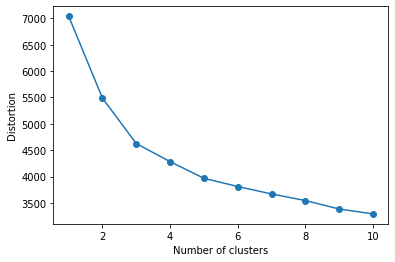

In [78]:
from sklearn.cluster import KMeans

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X.values)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.savefig('elbow.svg')
plt.show()

In [79]:
n_cluster = 4 # selecionado 4 clusters, pois é o local do cotovelo
kmeans = KMeans(n_clusters=n_cluster)  
kmeans.fit(X.values)

labels_kmeans = kmeans.labels_
labels_kmeans

array([2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 2, 2, 3, 3,
       2, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 3, 1,
       3, 0, 0, 2, 3, 1, 3, 3, 0, 0, 0, 2, 0])

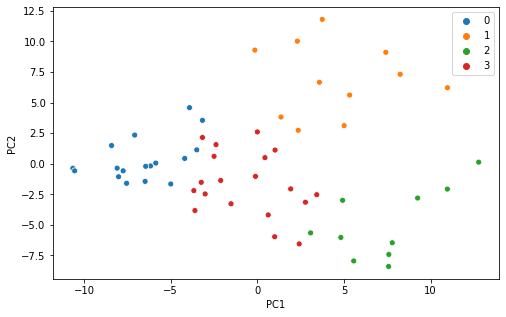

In [80]:
# Redução de dimensionalidade com PCA - conjunto X (gráfico em duas dimensões)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
pca = PCA(n_components=2, random_state=1)
scaler = StandardScaler()
feat_X_scaled = scaler.fit_transform(X.values)
pca_X = pca.fit_transform(feat_X_scaled)
fig = plt.figure(figsize=(8,5))
sns.scatterplot(x=pca_X[:,0], y=pca_X[:,1], hue=labels_kmeans[:], palette='tab10')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('pca.svg')
plt.show()

In [81]:
# Adicionando a Senioridade e o ClusterKMeans como novas colunas
Xadj=X.copy()
Xadj['Senioridade'] = Xadj.apply(lambda row: FindSeniority(row.name), axis=1)
Xadj['ClusterKMeans']=labels_kmeans
Xadj.head()

UniqueSkill,Competências Técnicas|Gestão de Projetos|Gestão da Qualidade,Competências Técnicas|Gestão de Projetos|Gestão de Cronograma,Competências Técnicas|Gestão de Projetos|Gestão de Custos,Competências Técnicas|Gestão de Projetos|Gestão de Escopo,Competências Técnicas|Gestão de Projetos|Gestão de Métricas e indicadores,Competências Técnicas|Gestão de Projetos|Gestão de Pessoas,Competências Técnicas|Gestão de Projetos|Gestão de Riscos,Competências Técnicas|Gestão de Projetos|Gestão de Stakeholders,Competências Técnicas|Gestão de Projetos|Métodos de gestão de software,Competências Técnicas|Quality Assurance|Análise de requisitos,...,Competências Comportamentais|-|Negociação,Competências Comportamentais|-|Organização,Competências Comportamentais|-|Planejamento,Competências Comportamentais|-|Proatividade,Competências Comportamentais|-|Relacionamento Interpessoal,Competências Comportamentais|-|Resolução de Problemas,Competências Comportamentais|-|Trabalho em Equipe,Competências Comportamentais|-|Visão Sistemica,Senioridade,ClusterKMeans
id_func1,3.5,2.5,1.5,3,2.5,2.5,3,2.5,3.1,4,...,3,3.5,3.5,3.5,4,4,4,3.5,SR,2
id_func2,3.5,4,2.5,4,4,4.5,4,3.8,4.2,4.2,...,4,4.8,4.5,4.1,4,4,4.5,4.5,SR,2
id_func3,1,1,1,1,1.2,2,1.5,1,1,3,...,3.5,4.7,4.7,4,4,4.3,4,3.8,JR,3
id_func4,1,1,1,1,1.5,1.5,1,1,2,1.8,...,4,4.5,3.5,4.1,5,4.1,4.5,4.1,JR,3
id_func5,2,2,2.1,3.1,2.1,1.4,2,1,2,3.1,...,3,4.5,4.5,4,4,4,4.5,4.5,JR,3


In [82]:
# Entre com o número do Cluster a ser exibido na variável ClusterI
ClusterI = 2
Xadj.loc[Xadj['ClusterKMeans']==ClusterI]

UniqueSkill,Competências Técnicas|Gestão de Projetos|Gestão da Qualidade,Competências Técnicas|Gestão de Projetos|Gestão de Cronograma,Competências Técnicas|Gestão de Projetos|Gestão de Custos,Competências Técnicas|Gestão de Projetos|Gestão de Escopo,Competências Técnicas|Gestão de Projetos|Gestão de Métricas e indicadores,Competências Técnicas|Gestão de Projetos|Gestão de Pessoas,Competências Técnicas|Gestão de Projetos|Gestão de Riscos,Competências Técnicas|Gestão de Projetos|Gestão de Stakeholders,Competências Técnicas|Gestão de Projetos|Métodos de gestão de software,Competências Técnicas|Quality Assurance|Análise de requisitos,...,Competências Comportamentais|-|Negociação,Competências Comportamentais|-|Organização,Competências Comportamentais|-|Planejamento,Competências Comportamentais|-|Proatividade,Competências Comportamentais|-|Relacionamento Interpessoal,Competências Comportamentais|-|Resolução de Problemas,Competências Comportamentais|-|Trabalho em Equipe,Competências Comportamentais|-|Visão Sistemica,Senioridade,ClusterKMeans
id_func1,3.5,2.5,1.5,3,2.5,2.5,3,2.5,3.1,4,...,3,3.5,3.5,3.5,4,4,4,3.5,SR,2
id_func2,3.5,4,2.5,4,4,4.5,4,3.8,4.2,4.2,...,4,4.8,4.5,4.1,4,4,4.5,4.5,SR,2
id_func19,2,1,1,2,1,2,2,2,3.5,4,...,2.5,3.5,4,4,4,4,5,3,SR,2
id_func20,4,4,2.5,4,4.5,4,4,4,4.5,4.5,...,4.5,2,4.5,4.5,4.5,4,4.5,4.5,SR,2
id_func23,3,4,3,4,4,3,4,4,4,4,...,4,4,4,4,3,4,4,4,COOR,2
id_func28,3.5,3.5,3,3,3.5,4,3,3.5,3.5,4,...,4,4.1,4.3,4.1,4,4.1,4.2,4,COOR,2
id_func35,4,3.8,3.5,4,4.2,4.2,4,4.2,4.1,3.8,...,4.2,4.1,4.3,4.1,4.5,4.3,4.2,3.8,COOR,2
id_func38,2.5,2.5,1.5,1.5,1.5,1,1,1.5,3,3.5,...,4,4.3,4,4.5,4.3,4.2,4.2,3.5,PL,2
id_func49,4,4.5,4,3,4,4,4,4,3,4,...,4.5,4.5,4.5,4.5,4.5,4.5,4.5,4.5,SR,2
id_func57,4,3.7,3.5,4,3.8,4,4,3.8,3.5,3.1,...,5,4,4.1,4.8,4.1,4.1,4,4.1,COOR,2


In [83]:
# Imprimindo as tabelas com os clusters identificados
for idxcluster in range (0, 4):
    qry = Xadj.loc[Xadj['ClusterKMeans']==idxcluster,['Senioridade', 'ClusterKMeans']]
    print(tabulate(qry, headers=['ID Colaborador', 'Senioridade', 'ClusterKMeans'], tablefmt='latex', numalign='center', floatfmt=".1f", showindex=True))

\begin{tabular}{llc}
\hline
 ID Colaborador   & Senioridade   &  ClusterKMeans  \\
\hline
 id\_func27        & JR            &        0        \\
 id\_func29        & JR            &        0        \\
 id\_func31        & JR            &        0        \\
 id\_func32        & ESTAG         &        0        \\
 id\_func33        & SR            &        0        \\
 id\_func36        & PL            &        0        \\
 id\_func37        & ESTAG         &        0        \\
 id\_func39        & JR            &        0        \\
 id\_func40        & ESTAG         &        0        \\
 id\_func41        & ESTAG         &        0        \\
 id\_func42        & JR            &        0        \\
 id\_func47        & ESTAG         &        0        \\
 id\_func48        & JR            &        0        \\
 id\_func54        & ESTAG         &        0        \\
 id\_func55        & TR            &        0        \\
 id\_func56        & JR            &        0        \\
 id\_func58   

Criando um classificador por regressão logística para estimar o **grupo** a partir do perfil de skills e da classificação feita pelo K-Means:

In [102]:
features = X.values
labels = labels_kmeans

# Normalizando:
scaler = StandardScaler().fit(features)
features_scaled = scaler.transform(features)

# Selecionamos os conjunto de treinamento e teste usando o método hold-out:
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = p, random_state = 42)

# Realizando a classificação por regressão logística:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(f'Acurácia na base de teste: {model.score(x_test, y_test):.2f}')

Acurácia na base de teste: 1.00


Criando um classificador por regressão logística para predizer a **senioridade** a partir do perfil de skills:

In [129]:
features = X.values
labels = Xadj['Senioridade'].values

# Normalizando:
scaler = StandardScaler().fit(features)
features_scaled = scaler.transform(features)

# Selecionamos os conjunto de treinamento e teste usando o método hold-out:
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(features_scaled, labels, test_size = p, random_state = 42)

# Realizando a classificação por regressão logística:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(x_train, y_train)


acuracia = accuracy_score(y_train, model.predict(x_train))
print('O modelo obteve %0.2f de acurácia na base de treinamento.' % acuracia)
acuracia = accuracy_score(y_test, model.predict(x_test))
print('O modelo obteve %0.2f de acurácia na base de teste.' % acuracia)

O modelo obteve 1.00 de acurácia na base de treinamento.
O modelo obteve 0.58 de acurácia na base de teste.


In [116]:
len(x_test)

12

In [86]:
# Usando Cross Validation 

from sklearn.model_selection import cross_val_score

model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
results = cross_val_score(model, x_train, y_train, cv = 5, scoring = 'accuracy')
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
intervalo(results)

C:\Users\jmsan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Acurácia média: 48.89%
Intervalo de acurácia: [26.23% ~ 71.55%]


In [87]:
from sklearn.model_selection import KFold

cv = KFold(n_splits = 5, shuffle = True)
model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
results = cross_val_score(model, x_train, y_train, cv = cv)
intervalo(results)

Acurácia média: 46.67%
Intervalo de acurácia: [30.04% ~ 63.30%]


In [135]:
from sklearn import svm
from sklearn.metrics import precision_score, recall_score

features = X.values
labels = Xadj['Senioridade'].values

# Normalizando:
scaler = StandardScaler().fit(features)
features_scaled = scaler.transform(features)

# Selecionamos os conjunto de treinamento e teste usando o método hold-out:
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(features_scaled, labels, test_size = p, random_state = 42)

#clf_svm = svm.SVC(C=0.5, gamma = 'auto', kernel='linear', random_state=1)
clf_svm = svm.SVC(C=1, gamma = 'auto', kernel='linear', decision_function_shape='ovo', random_state=1)
clf_svm.fit(x_train, y_train)

y_train_pred = clf_svm.predict(x_train)
score_accuracy = accuracy_score(y_train, y_train_pred)
score_precision = precision_score(y_train, y_train_pred, average='micro')
score_recall = recall_score(y_train, y_train_pred, average='micro')
print(f"SVM Validation Train = Precision: {score_precision:.2f}, Recall: {score_recall:.2f}, Accuracy: {score_accuracy:.2f}")

y_test_pred = clf_svm.predict(x_test) 
score_accuracy = accuracy_score(y_test, y_test_pred)
score_precision = precision_score(y_test, y_test_pred, average='micro')
score_recall = recall_score(y_test, y_test_pred, average='micro')
print(f"SVM Validation Test = Precision: {score_precision:.2f}, Recall: {score_recall:.2f}, Accuracy: {score_accuracy:.2f}")

SVM Validation Train = Precision: 1.00, Recall: 1.00, Accuracy: 1.00
SVM Validation Test = Precision: 0.50, Recall: 0.50, Accuracy: 0.50


Criando um classificador por regressão logística para predizer o **projeto** a partir do perfil de skills:

In [89]:
# Adicionando uma coluna a Xadj com o projeto de cada colaborador
Xadj['Projeto']=Xadj.apply(lambda row: FindProject(row.name), axis=1)

In [90]:
features = X.values
labels = Xadj['Projeto'].values

# Normalizando:
scaler = StandardScaler().fit(features)
features_scaled = scaler.transform(features)

# Selecionamos os conjunto de treinamento e teste usando o método hold-out:
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(features_scaled, labels, test_size = p, random_state = 42)

# Realizando a classificação por regressão logística:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(x_train, y_train)

acuracia = accuracy_score(y_test, model.predict(x_test))
print('O modelo obteve %0.4f de acurácia.' % acuracia)

O modelo obteve 0.5000 de acurácia.


In [91]:
# Usando Cross Validation 

from sklearn.model_selection import cross_val_score

model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
results = cross_val_score(model, x_train, y_train, cv = 5, scoring = 'accuracy')
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
intervalo(results)

C:\Users\jmsan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Acurácia média: 77.78%
Intervalo de acurácia: [77.78% ~ 77.78%]


In [133]:
from sklearn import svm
from sklearn.metrics import precision_score, recall_score

features = X.values
labels = Xadj['Projeto'].values

# Normalizando:
scaler = StandardScaler().fit(features)
features_scaled = scaler.transform(features)

# Selecionamos os conjunto de treinamento e teste usando o método hold-out:
from sklearn.model_selection import train_test_split
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(features_scaled, labels, test_size = p, random_state = 42)

#clf_svm = svm.SVC(C=0.5, gamma = 'auto', random_state=1)
clf_svm = svm.SVC(C=1, gamma = 'auto', kernel='linear', decision_function_shape='ovo', random_state=1)
clf_svm.fit(x_train, y_train)

y_train_pred = clf_svm.predict(x_train) 
score_accuracy = accuracy_score(y_train, y_train_pred)
score_precision = precision_score(y_train, y_train_pred, average='micro')
score_recall = recall_score(y_train, y_train_pred, average='micro')
print(f"SVM Validation Train = Precision: {score_precision:.2f}, Recall: {score_recall:.2f}, Accuracy: {score_accuracy:.2f}")

y_test_pred = clf_svm.predict(x_test) 
score_accuracy = accuracy_score(y_test, y_test_pred)
score_precision = precision_score(y_test, y_test_pred, average='micro')
score_recall = recall_score(y_test, y_test_pred, average='micro')
print(f"SVM Validation Test = Precision: {score_precision:.2f}, Recall: {score_recall:.2f}, Accuracy: {score_accuracy:.2f}")

SVM Validation Train = Precision: 1.00, Recall: 1.00, Accuracy: 1.00
SVM Validation Test = Precision: 0.50, Recall: 0.50, Accuracy: 0.50


Utilizando o agrupamento hierárquico / dendrograma para identificar outliers em clusters de colaboradores com perfis de skills semelhantes:

In [93]:
def llf (id):
    return Xadj.index[id]+' | '+FindSeniority(Xadj.index[id])

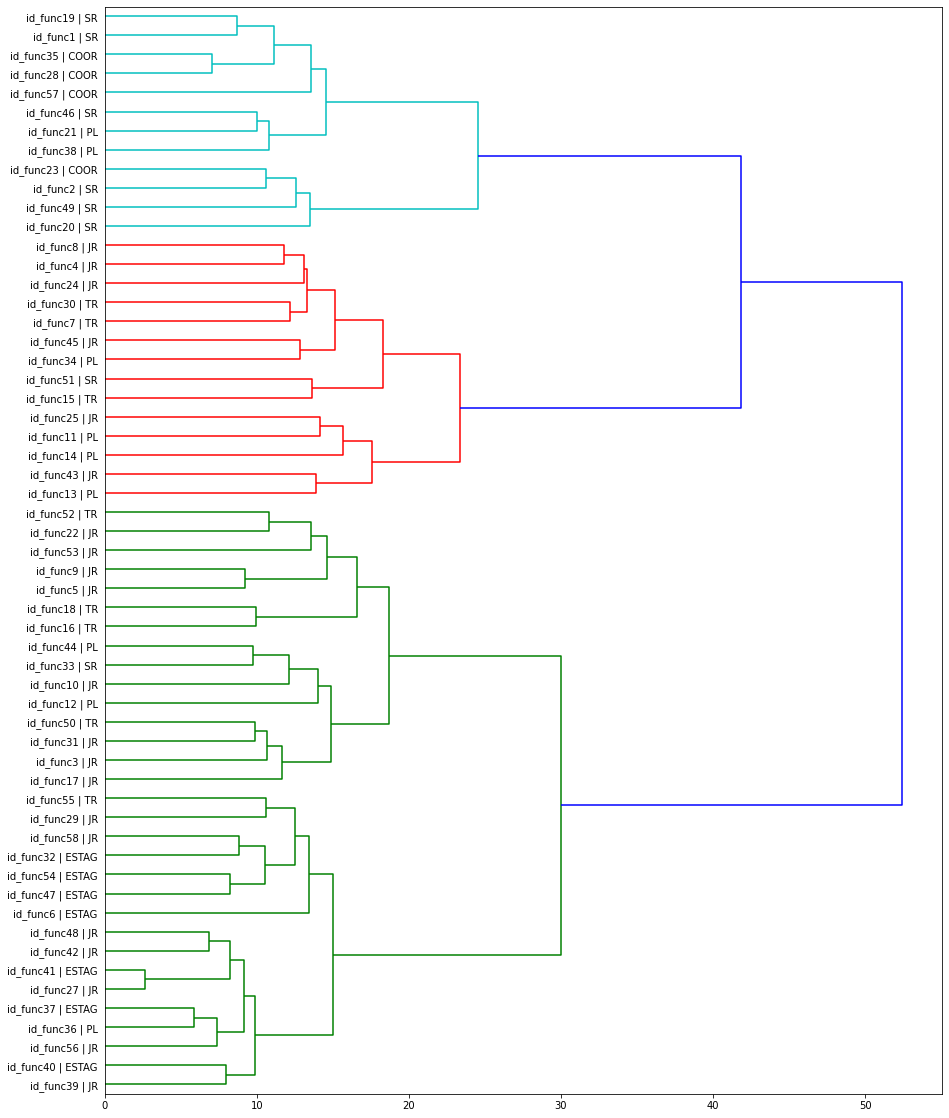

In [101]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15, 20))
dend = sch.dendrogram(sch.linkage(X.values, method='ward'), leaf_label_func=llf, orientation='right', leaf_font_size=10)
plt.savefig('dendrogram.svg')

In [95]:
print("--- %s seconds ---" % (time.time() - start_time)) # Tempo total para rodar todo o pipeline

--- 51.2460196018219 seconds ---


Formatação de tabelas auxiliares:

In [96]:
qry = FotoSkills[['Tipo', 'Area', 'Skill']]
print(tabulate(qry, headers=['Tipo', 'Area', 'Skill'], tablefmt='latex', numalign='center', floatfmt=".1f", showindex=False))

\begin{tabular}{lll}
\hline
 Tipo                         & Area               & Skill                                        \\
\hline
 Competências Técnicas        & Gestão de Projetos & Gestão da Qualidade                          \\
 Competências Técnicas        & Gestão de Projetos & Gestão de Cronograma                         \\
 Competências Técnicas        & Gestão de Projetos & Gestão de Custos                             \\
 Competências Técnicas        & Gestão de Projetos & Gestão de Escopo                             \\
 Competências Técnicas        & Gestão de Projetos & Gestão de Métricas e indicadores             \\
 Competências Técnicas        & Gestão de Projetos & Gestão de Pessoas                            \\
 Competências Técnicas        & Gestão de Projetos & Gestão de Riscos                             \\
 Competências Técnicas        & Gestão de Projetos & Gestão de Stakeholders                       \\
 Competências Técnicas        & Gestão de Projetos & Mét

In [97]:
# Retirando um trecho para exemplificar a matriz FotoSkills
qry = pd.concat([FotoSkills.iloc[0:7], FotoSkills.iloc[9:15], FotoSkills.iloc[63:69], FotoSkills.iloc[113:119], FotoSkills.iloc[128:134]]).iloc[:,0:6]
print(tabulate(qry, headers=qry.columns, tablefmt='latex', numalign='center', floatfmt=".1f", showindex=False))

\begin{tabular}{lllccc}
\hline
 Tipo                         & Area               & Skill                            &  id\_func1  &  id\_func2  &  id\_func3  \\
\hline
 Competências Técnicas        & Gestão de Projetos & Gestão da Qualidade              &    3.5     &    3.5     &    1.0     \\
 Competências Técnicas        & Gestão de Projetos & Gestão de Cronograma             &    2.5     &    4.0     &    1.0     \\
 Competências Técnicas        & Gestão de Projetos & Gestão de Custos                 &    1.5     &    2.5     &    1.0     \\
 Competências Técnicas        & Gestão de Projetos & Gestão de Escopo                 &    3.0     &    4.0     &    1.0     \\
 Competências Técnicas        & Gestão de Projetos & Gestão de Métricas e indicadores &    2.5     &    4.0     &    1.2     \\
 Competências Técnicas        & Gestão de Projetos & Gestão de Pessoas                &    2.5     &    4.5     &    2.0     \\
 Competências Técnicas        & Gestão de Projetos & Gestão de 

In [98]:
# Retirando um trecho para exemplificar a matriz de demanda dos testers do projeto 1
qry = pd.concat([DemandaSkillTesters.iloc[0:7], DemandaSkillTesters.iloc[9:15], DemandaSkillTesters.iloc[38:44], DemandaSkillTesters.iloc[44:50], DemandaSkillTesters.iloc[62:68]]).iloc[:,0:8]
print(tabulate(qry, headers=qry.columns, tablefmt='latex', numalign='center', floatfmt=".1f", showindex=False))

\begin{tabular}{llllllll}
\hline
 Projeto   & Tipo                         & Area               & Skill                            & JR         & PL         & SR         & MS     \\
\hline
 Proj1     & Competências Técnicas        & Gestão de Projetos & Gestão de Cronograma             & Novato     & Praticante & Expert     & Expert \\
 Proj1     & Competências Técnicas        & Gestão de Projetos & Gestão de Custos                 & Leigo      & Leigo      & Grupo      & Grupo  \\
 Proj1     & Competências Técnicas        & Gestão de Projetos & Gestão de Riscos                 & Novato     & Praticante & Expert     & Expert \\
 Proj1     & Competências Técnicas        & Gestão de Projetos & Gestão de Stakeholders           & Leigo      & Novato     & Praticante & Expert \\
 Proj1     & Competências Técnicas        & Gestão de Projetos & Gestão de Pessoas                & Novato     & Praticante & Expert     & Expert \\
 Proj1     & Competências Técnicas        & Gestão de Projetos & G

In [99]:
# Retirando um trecho para exemplificar a matriz de demanda dos coordenadores
qry = pd.concat([DemandaSkillCoord.iloc[0:7], DemandaSkillCoord.iloc[8:22], DemandaSkillCoord.iloc[62:67], DemandaSkillCoord.iloc[67:74]]).iloc[:,0:6]
print(tabulate(qry, headers=qry.columns, tablefmt='latex', numalign='center', floatfmt=".1f", showindex=False))

\begin{tabular}{llllll}
\hline
 Tipo                         & Area               & Skill                            & Proj1      & Proj6      & Proj2      \\
\hline
 Competências Técnicas        & Gestão de Projetos & Gestão de Cronograma             & Praticante & Praticante & Praticante \\
 Competências Técnicas        & Gestão de Projetos & Gestão de Riscos                 & Praticante & Praticante & Praticante \\
 Competências Técnicas        & Gestão de Projetos & Gestão de Stakeholders           & Praticante & Praticante & Praticante \\
 Competências Técnicas        & Gestão de Projetos & Gestão de Pessoas                & Praticante & Praticante & Praticante \\
 Competências Técnicas        & Gestão de Projetos & Gestão de Métricas e indicadores & Praticante & Praticante & Praticante \\
 Competências Técnicas        & Gestão de Projetos & Gestão de Escopo                 & Praticante & Praticante & Praticante \\
 Competências Técnicas        & Gestão de Projetos & Gestão da Qua

In [100]:
# Retirando um trecho para exemplificar a matriz de informação dos colaboradores
qry = pd.concat([Testers.iloc[0:30]]).iloc[:,0:4]
print(tabulate(qry, headers=qry.columns, tablefmt='latex', numalign='center', floatfmt=".1f", showindex=False))

\begin{tabular}{llll}
\hline
 ID        & Nome        & Senioridade   & Projeto   \\
\hline
 id\_func1  & nome\_func1  & SR            & Proj7     \\
 id\_func2  & nome\_func2  & SR            & Proj6     \\
 id\_func3  & nome\_func3  & JR            & Proj1     \\
 id\_func4  & nome\_func4  & JR            & Proj2     \\
 id\_func5  & nome\_func5  & JR            & Proj7     \\
 id\_func6  & nome\_func6  & ESTAG         & Proj1     \\
 id\_func7  & nome\_func7  & TR            & Proj6     \\
 id\_func8  & nome\_func8  & JR            & Proj6     \\
 id\_func9  & nome\_func9  & JR            & Proj7     \\
 id\_func10 & nome\_func10 & JR            & Proj1     \\
 id\_func11 & nome\_func11 & PL            & Proj6     \\
 id\_func12 & nome\_func12 & PL            & Proj7     \\
 id\_func13 & nome\_func13 & PL            & Proj7     \\
 id\_func14 & nome\_func14 & PL            & Proj6     \\
 id\_func15 & nome\_func15 & TR            & Proj1     \\
 id\_func16 & nome\_func16 & TR       